# Overview

Welcome to aurora-asi-lib. This introductary notebook guides you though some of the aurora-asi-lib (imported as asilib) functionality.

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import asilib

plt.style.use('dark_background')

/home/mike/research/aurora-asi-lib/env/lib/python3.9/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


First of all, you should know where the data and movies are saved to. This information is in `asilib.config` and can be changed with `python3 -m asilib config` to configure asilib.

In [2]:
asilib.config

{'ASILIB_DIR': PosixPath('/home/mike/research/aurora-asi-lib/asilib'),
 'ASI_DATA_DIR': PosixPath('/media/mike/2D6742F55A2E0A82/asilib-data'),
 'IRBEM_WARNING': True}

As you can guess, `asilib.config['ASILIB_DIR']` is the directory where this code resides, `asilib.config['ASI_DATA_DIR']` is the directory where the data is saved to.

# Working with a single frame

Since we sold you on easily downloading, loading, plotting and analyzing auroral images with `asilib`, lets begin with a plot of a bright auroral arc that was analyzed by Imajo et al., 2021 "Active auroral arc powered by accelerated electrons from very high altitudes"

In [3]:
time = datetime(2017, 9, 15, 2, 34, 0) 
array = 'THEMIS'
station = 'RANK'

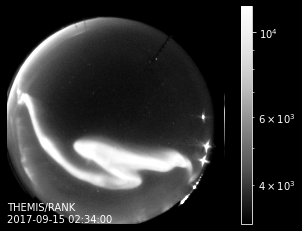

In [4]:
frame_time, frame, ax, im = asilib.plot_frame(time, array, station, 
                    color_norm='log', color_map='auto')
plt.colorbar(im)
ax.axis('off');

Notice that you did not need to explicitly download or load the data---`asilib` takes care of that for you. 

Now what if you need to analyze the image? `asilib.plot_frame` returns the time stamp of the frame `frame_time` and the 2-d image np.array `frame`.

In [5]:
frame_time, frame

(datetime.datetime(2017, 9, 15, 2, 34, 0, 42000),
 array([[2777, 2739, 2757, ..., 2780, 2756, 2759],
        [2780, 2782, 2807, ..., 2779, 2745, 2765],
        [2752, 2779, 2767, ..., 2776, 2723, 2781],
        ...,
        [2747, 2748, 2770, ..., 2749, 2738, 2762],
        [2759, 2772, 2767, ..., 2739, 2758, 2769],
        [2762, 2756, 2744, ..., 2753, 2742, 2736]], dtype=uint16))

You can also just load the data using `asilib.get_frame()`. We will use this to get a slice of pixels through zenith.

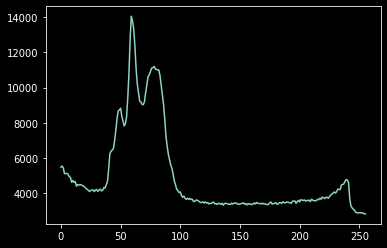

In [6]:
frame_time, frame = asilib.get_frame(time, array, station, force_download=False)
plt.plot(frame[:, frame.shape[0]//2])  # don't forget that array rows correspond to latitude pixels

Now lets add the intensity mapped to the assumed emission altitude. To do this we use RANK's skymap file. We will use the skymaps's `FULL_MAP_LATITUDE` array to map the pixels. This function requires a time so that the correct skymap file is loaded.

In [7]:
skymap = asilib.load_skymap(array, station, time)
skymap.keys()

dict_keys(['GENERATION_INFO', 'SITE_UID', 'IMAGER_UID', 'PROJECT_UID', 'IMAGER_UNIX_TIME', 'SITE_MAP_LATITUDE', 'SITE_MAP_LONGITUDE', 'SITE_MAP_ALTITUDE', 'FULL_ROW', 'FULL_COLUMN', 'FULL_IGNORE', 'FULL_SUBTRACT', 'FULL_MULTIPLY', 'FULL_ELEVATION', 'FULL_AZIMUTH', 'FULL_MAP_ALTITUDE', 'FULL_MAP_LATITUDE', 'FULL_MAP_LONGITUDE', 'FULL_BIN', 'BIN_ROW', 'BIN_COLUMN', 'BIN_ELEVATION', 'BIN_AZIMUTH', 'BIN_MAP_ALTITUDE', 'BIN_MAP_LATITUDE', 'BIN_MAP_LONGITUDE', 'skymap_path'])

`asilib.load_skymap()` loads the skymap file dated most recently before the time of interest. 

Beware: the parameter order for most functions in `asilib` is (time, array, station), however, the order for `asilib.load_skymap()`, it is (array, station, time). The order will become consistent by version 1.0.0

In [8]:
skymap['skymap_path']

PosixPath('/media/mike/2D6742F55A2E0A82/asilib-data/themis/skymap/rank/themis_skymap_rank_20150825_vXX.sav')

In [9]:
skymap['FULL_MAP_ALTITUDE'] # Meter units

array([ 90000., 110000., 150000.], dtype=float32)

In [10]:
# first dimention is the altitude referenced by skymap['FULL_MAP_ALTITUDE']
skymap['FULL_MAP_LATITUDE'][1, :, frame.shape[0]//2]

array([      nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan, 73.43417 , 72.6641  ,
       71.9516  , 71.296135, 70.696045, 70.148735, 69.650955, 69.19906 ,
       68.7892  , 68.41755 , 68.08037 , 67.774155, 67.49567 , 67.24193 ,
       67.01028 , 66.79833 , 66.60396 , 66.42528 , 66.26063 , 66.10855 ,
       65.96775 , 65.83708 , 65.715546, 65.60226 , 65.49642 , 65.397354,
       65.30442 , 65.217094, 65.134865, 65.05731 , 64.98403 , 64.91468 ,
       64.848946, 64.78654 , 64.7272  , 64.670715, 64.61685 , 64.565445,
       64.5163  , 64.46927 , 64.42421 , 64.38099 , 64.339485, 64.29958 ,
       64.2612  , 64.22422 , 64.188576, 64.154175, 64.12095 , 64.08883 ,
       64.05775 , 64.02766 , 63.9985  , 63.970222, 63.94278 , 63.916126,
       63.89022 , 63.865025, 63.840504, 63.816624, 63.793358, 63.770668,
       63.74853 , 63.726917, 63.70581 , 63.685177, 63.665005, 63.645264,
       63.62594 , 63.607014, 63.588467, 63.570286, 

Text(0, 0.5, 'Intensity')

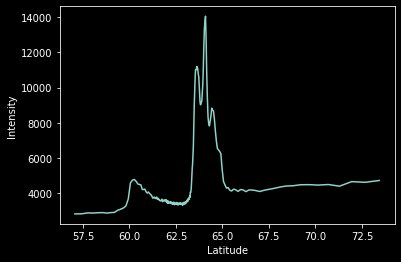

In [11]:
plt.plot(skymap['FULL_MAP_LATITUDE'][1, :-1, frame.shape[0]//2], frame[:, frame.shape[0]//2])
plt.xlabel('Latitude'); plt.ylabel('Intensity')

# Keogram
A lot of the above functionality is contained in `asilib.keogram` and `asilib.plot_keogram` functions. For reference, `asilib.plot_keogram` internally calls `asilib.keogram`.

In [12]:
asilib.plot_keogram([datetime(2017, 9, 15, 2, 0, 0), datetime(2017, 9, 15, 3, 15, 0)], 
    'THEMIS', 'RANK');

Notice how the y-axis here is pixel number and not geographic latitude. `asilib.keogram` (and likewise `asilib.plot_keogram`) takes an argument `map_alt`. Let's see what the keogram looks like mapped to 110 km.

(<AxesSubplot:title={'center':'2017-09-15 | THEMIS-RANK keogram'}>,
 <matplotlib.collections.QuadMesh at 0x7f2f9a95b0a0>)

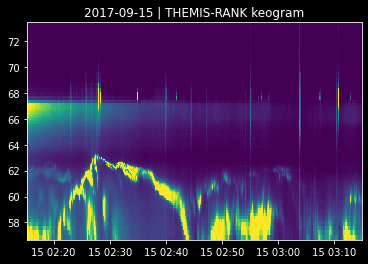

In [ ]:

asilib.plot_keogram([datetime(2017, 9, 15, 2, 0, 0), datetime(2017, 9, 15, 3, 15, 0)], 
    'THEMIS', 'RANK', map_alt=110)

Simple enough? You can choose any other altitude from the `FULL_MAP_ALTITUDE` key in the skymap calibration data. If you pick a wrong altitude, `asilib` will give you a helpfull error.

In [ ]:
asilib.plot_keogram([datetime(2017, 9, 15, 2, 0, 0), datetime(2017, 9, 15, 3, 15, 0)], 
    'THEMIS', 'RANK', map_alt=100)

AssertionError: 100 km is not in calibration altitudes: [ 90. 110. 150.] km

# Working with multiple frames

Coming soon!

# Basic Movie

Coming soon!

# Satellite conjunction

Coming soon!